In [1]:
import cmath
import random
import numpy as np

In [2]:
# Гамма-распределение: Г(k=2, θ=2)
def gamma(x):
    if x <= 0:
        return 0
    return (x * cmath.exp(-x/2.0) / 4.0).real

In [3]:
# Нормальное распределение: N(μ=4, σ^2=8/n)
def normal(x, dispersion):
    return (cmath.exp(-(x - 4)**2 / (2.0 * dispersion)) / (2 * dispersion * cmath.pi)**0.5).real

In [4]:
# заполняем массив X произвольными значениями от 0 до 20
X = []
for i in range(1000):
    X.append(random.random() * 20)
# и упорядочиваем значения в нём
X.sort()

In [5]:
# заполняем массив Y значениями gamma(x), где x из X
Y = []
for i in range(1000):
    Y.append(gamma(X[i]))

In [6]:
# заполняем массив G произвольными значениями, имеющими Г-распределение
G = []
for i in range(1000):
    G.append(random.gammavariate(2.0, 2.0))

In [7]:
from matplotlib import pylab as plt

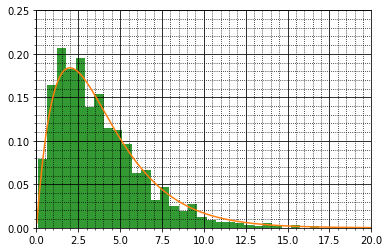

In [8]:
# построим график плотности Гамма-распределения и гистаграмму выборки G
plt.minorticks_on()
plt.grid(which='major', color='k', linewidth=0.8)
plt.grid(which='minor', color='k', linestyle=':')
plt.axis([0, 20, 0, 0.25])
plt.hist(G, 40, density=True, facecolor='g', alpha=0.8)
plt.plot(X, Y)
plt.show()

In [9]:
n = 5  # объём выборки

In [10]:
# заполняем массив Y значениями normal(x), где x из X
for i in range(1000):
    Y[i] = normal(X[i], 8.0 / n)

In [11]:
# усредняем значения G[i], где i = 1, ... , n
G = [0] * n
for i in range(n):
    G[i] = np.array([random.gammavariate(2.0, 2.0) for _ in range(1000)])
res = sum(G) / n

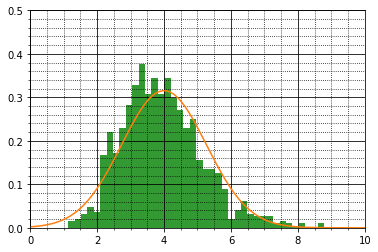

In [12]:
# построим график плотности нормального распределения и гистаграмму усреднённой выборки res
plt.minorticks_on()
plt.grid(which='major', color='k', linewidth=0.8)
plt.grid(which='minor', color='k', linestyle=':')
plt.axis([0, 10, 0, 0.5])
plt.hist(res, 40, density=True, facecolor='g', alpha=0.8)
plt.plot(X, Y)
plt.show()

In [13]:
n = 10  # далее аналогичные рассуждения для выборки объёмом 10

for i in range(1000):
    Y[i] = normal(X[i], 8.0 / n)

G = [0] * n
for i in range(n):
    G[i] = np.array([random.gammavariate(2.0, 2.0) for _ in range(1000)])

res = sum(G) / n

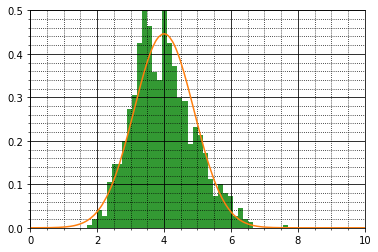

In [14]:
plt.minorticks_on()
plt.grid(which='major', color='k', linewidth=0.8)
plt.grid(which='minor', color='k', linestyle=':')
plt.axis([0, 10, 0, 0.5])
plt.hist(res, 40, density=True, facecolor='g', alpha=0.8)
plt.plot(X, Y)
plt.show()

In [15]:
n = 40  # далее аналогичные рассуждения для выборки объёмом 40

for i in range(1000):
    Y[i] = normal(X[i], 8.0 / n)

G = [0] * n
for i in range(n):
    G[i] = np.array([random.gammavariate(2.0, 2.0) for _ in range(1000)])

res = sum(G) / n

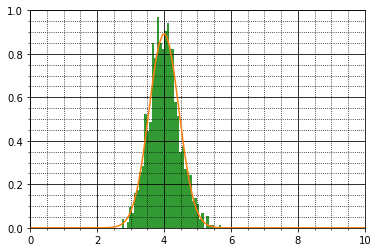

In [16]:
plt.minorticks_on()
plt.grid(which='major', color='k', linewidth=0.8)
plt.grid(which='minor', color='k', linestyle=':')
plt.axis([0, 10, 0, 1])
plt.hist(res, 40, density=True, facecolor='g', alpha=0.8)
plt.plot(X, Y)
plt.show()

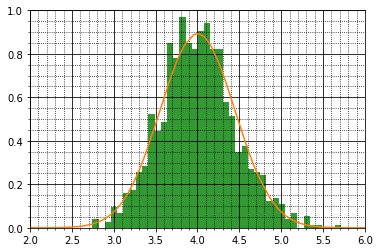

In [17]:
# тот же график в другом маштабе
plt.minorticks_on()
plt.grid(which='major', color='k', linewidth=0.8)
plt.grid(which='minor', color='k', linestyle=':')
plt.axis([2, 6, 0, 1])
plt.hist(res, 40, density=True, facecolor='g', alpha=0.8)
plt.plot(X, Y)
plt.show()

Таким образом при n = 5 имеем распределение N(4, 1.6)
n = 10: распределение N(4, 0.8)
n = 40: распределение N(4, 0.2)

Нетрудно увидеть, что полученные гистограммы достаточно хорошо аппроксимируются графиками плотности нормального распределения с соответствующими параметрами (как и было предсказано ЦПТ). При этом с ростом n точность аппроксимации увеличивается.